# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
DATASET_PATH = '../data/imputed_data.csv'
df = pd.read_csv(DATASET_PATH)

In [3]:
# Eliminar la primera columna que es el indice
df = df.drop(df.columns[0], axis=1)

Vemos los primeros estadísticos de las distribuciones de las variables: 

In [4]:
df.describe()

,EDAD,SEX0,HTA,DBT,DLP,TABAQ,ANTEC IAM / Angina inestable,ANTEC BY PASS,ANTEC ATC,ANTEC ACE,...,TROMBOL,CRM,MUERTE HOSP,IAM HOSP(SI INTERNO POR ANGINA) O REIAM,APIAM,Peor KILLIP,ANGINA REFRACT o RECURR,ACV/TIA,SANGRADO MAYOR*,I RENAL AGUDA
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,...,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000
mean,66.449945,0.704620,0.663916,0.196370,0.547305,0.350385,0.265127,0.072607,0.186469,0.039054,...,0.008251,0.080308,0.035204,0.014851,0.011551,1.073707,0.034653,0.002750,0.015402,0.055556
std,12.313550,0.456339,0.472498,0.397361,0.497894,0.477222,0.441522,0.259562,0.389592,0.193777,...,0.090483,0.271844,0.184345,0.120992,0.106883,0.403700,0.182951,0.052385,0.123177,0.229124
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     1818 non-null   int64  
 1   SEX0                                     1818 non-null   int64  
 2   HTA                                      1818 non-null   int64  
 3   DBT                                      1818 non-null   int64  
 4   DLP                                      1818 non-null   int64  
 5   TABAQ                                    1818 non-null   int64  
 6   ANTEC IAM / Angina inestable             1818 non-null   int64  
 7   ANTEC BY PASS                            1818 non-null   int64  
 8   ANTEC ATC                                1818 non-null   int64  
 9   ANTEC ACE                                1818 non-null   int64  
 10  ANTEC INS RENAL                          1818 no

In [6]:
NUMERICAL_FEATURES = ['PESO Kg', 'ALTURA cm', 'TROPONINA MAX', 'CREAT', 'GLUCEMIA INGR', 'GB', 'TAS INGRESO', 'FC INGRESO']
NUMERICAL_CONTINOUS = NUMERICAL_FEATURES
CATEGORY_FEATURES = ['SEX0', 'HTA', 'DBT', 'DLP', 'TABAQ', 'ANTEC IAM / Angina inestable', 'ANTEC BY PASS', 'ANTEC ATC', 'ANTEC ACE', 'ANTEC INS RENAL', 'ACV TIA PREV', 'EPOC', 'CLAUD ITTE', 'BB PREV', ' IECA/AT2  PREV', 'B CA PREV', 'AAS PREV', 'HIPOGLUCEMIANTES', 'DIURETICOS', 'INSULINA', 'ECG INFRA ST', 'ECG SUPRA ST', 'ECG INV T', 'BRI', 'BRD', 'ECG MCP', 'ECG FA', 'tropst', 'TnT Ultrasensible', 'Elevacion troponina T', 'KILLIP Ingreso', 'AAS', 'BB', 'IECA', 'AT2', 'Clopi - prasu - tica', 'HEP sc o iv', 'IIb IIIa', 'B CA', 'ESTATINAS', 'HIPOGLUC METFORM', 'HIPOGL SULFAN', 'HIPOGL GLITAZ', 'INSULINA', 'INS + HIPOGL', 'INOTROPICOS', 'FUNCION VENTRICULAR IZQ', 'DIAGNOSTICO', 'PRUEBA FUNC.', 'PRUEBA FUNC DE ALTO RIESGO', 'CCG', 'TRONCO', 'ATC PRIMARIA', 'ATC INTRAHOSP', 'TROMBOL', 'CRM', 'IAM HOSP(SI INTERNO POR ANGINA) O REIAM', 'APIAM', 'Peor KILLIP', 'ANGINA REFRACT o RECURR', ' ACV/TIA', 'SANGRADO MAYOR*', 'I RENAL AGUDA', 'NUMERO VASOS']

TARGET = "MUERTE HOSP"

Continuamos analizando las variables realizando histogramas, qq-plots y box-plots para ver distribuciones y outliers de las variables numéricas:

In [7]:
from utils import outlier_diagnostic_plots

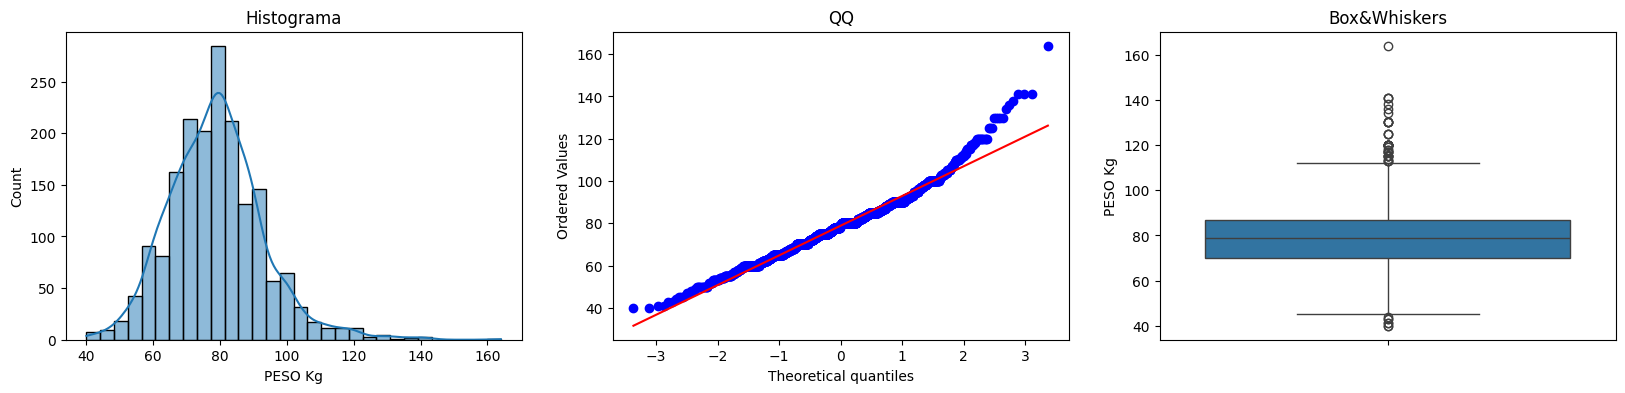

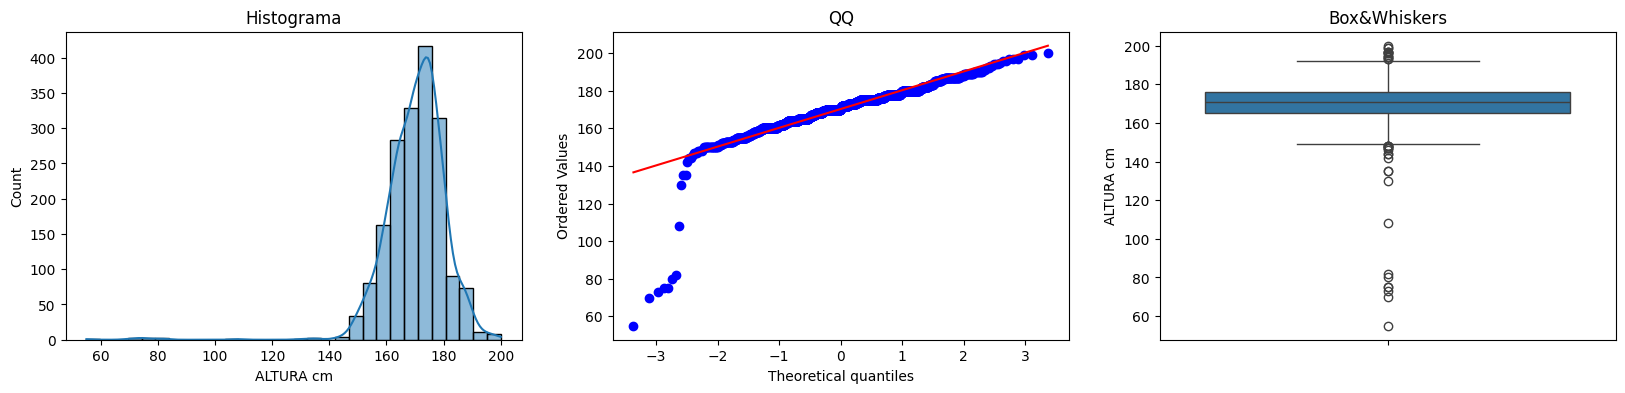

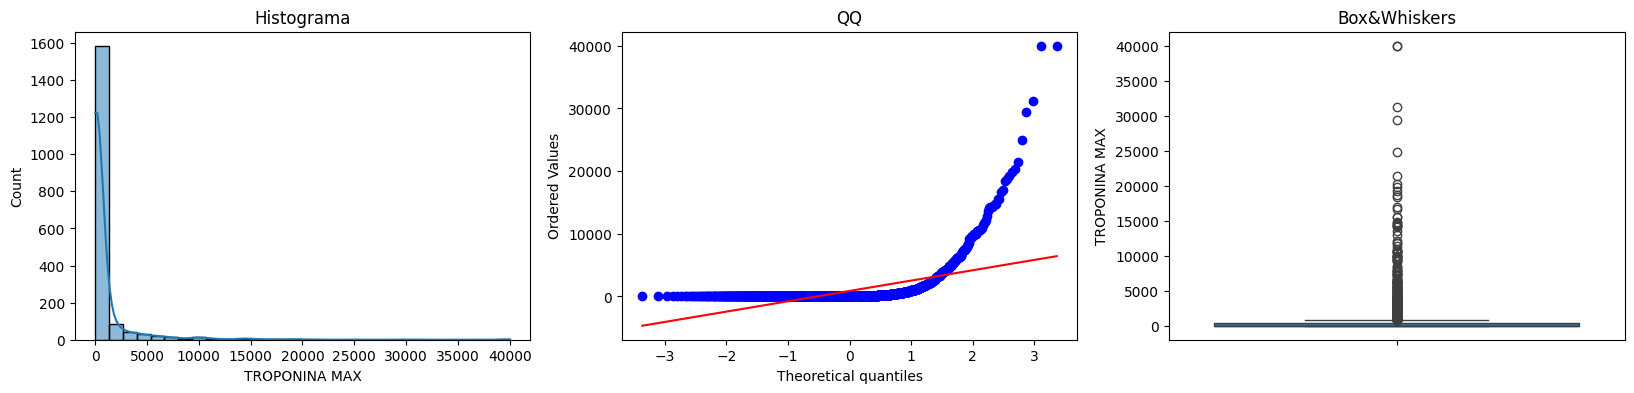

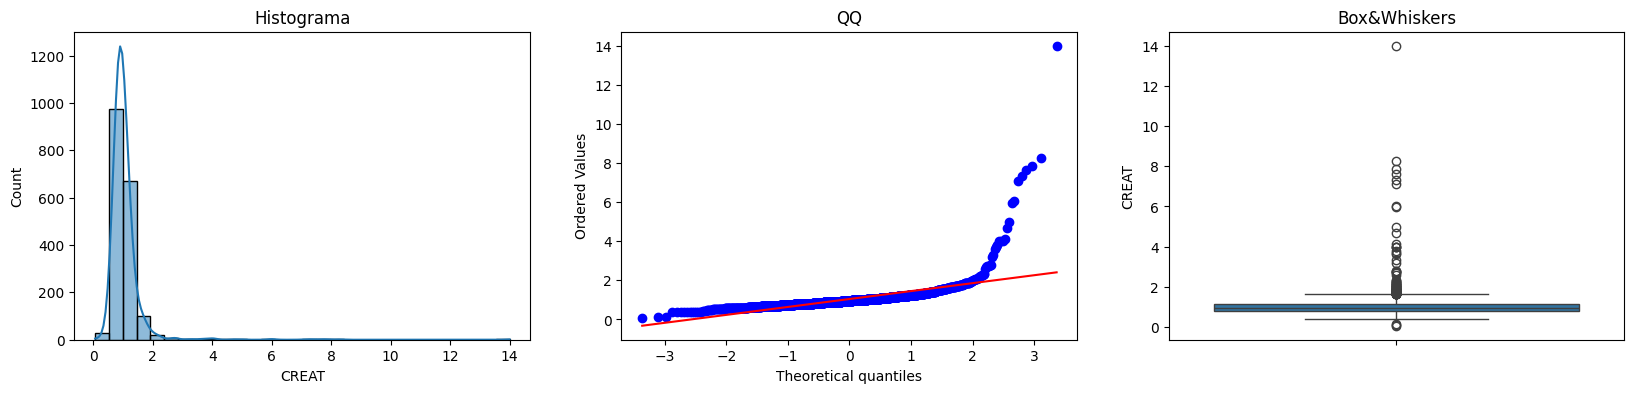

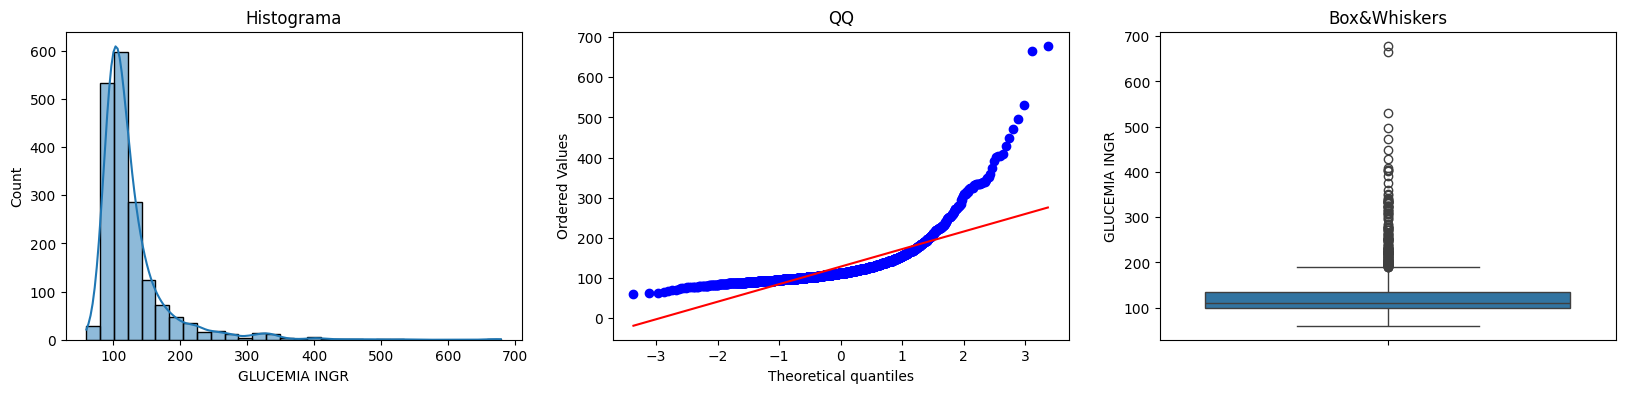

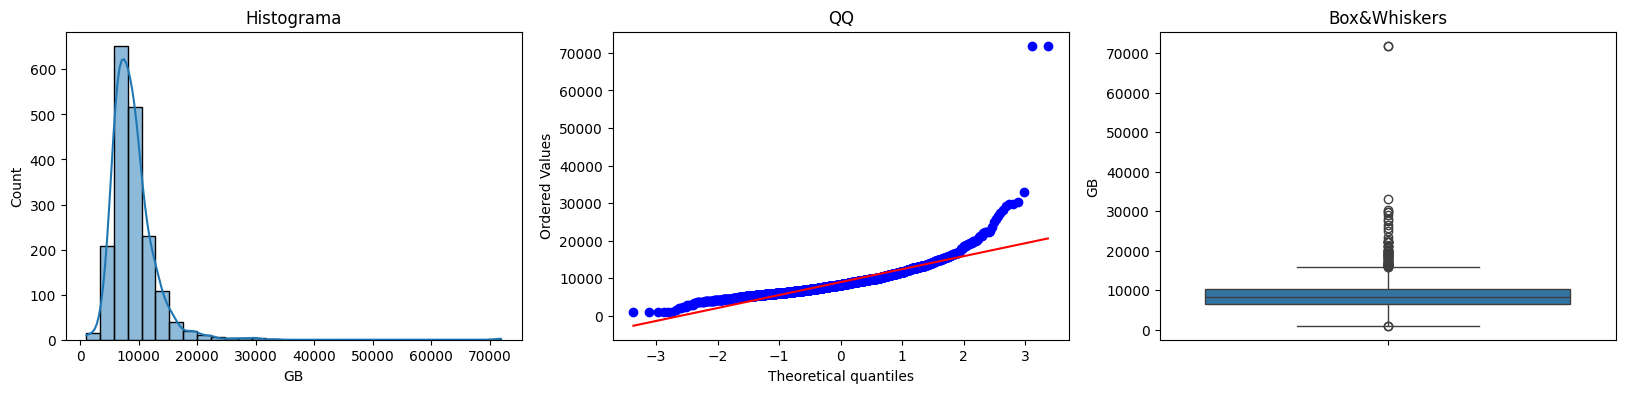

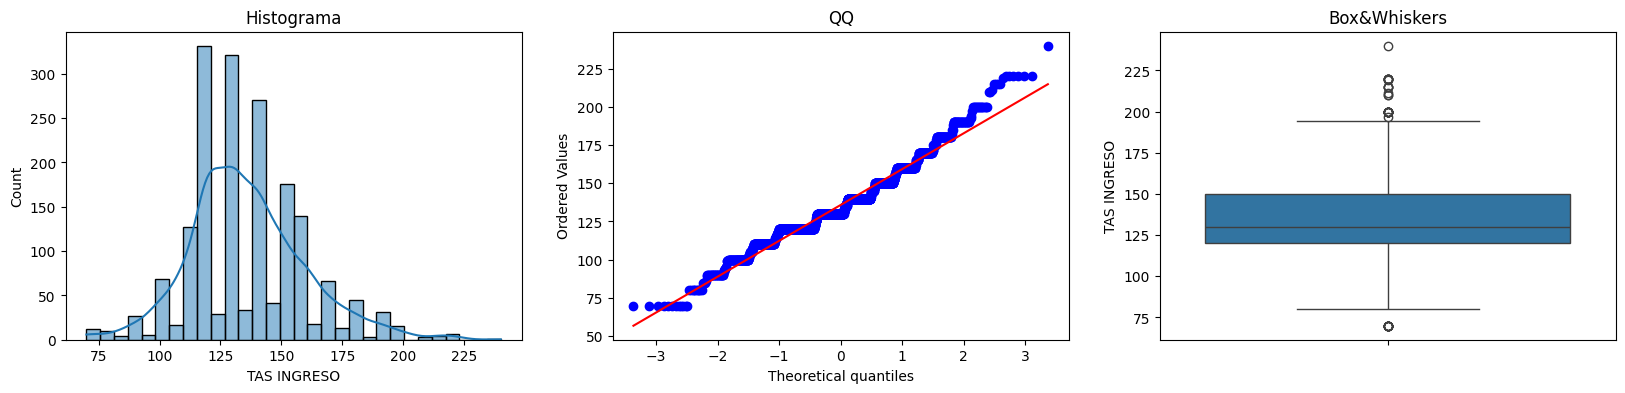

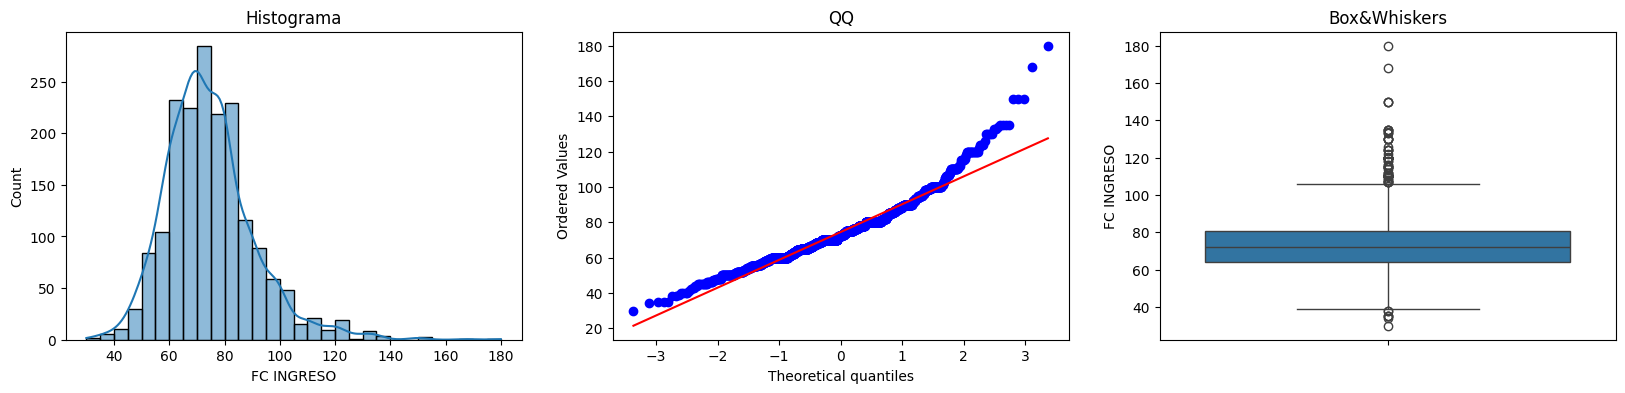

In [8]:
for column in df[NUMERICAL_CONTINOUS].columns:
    outlier_diagnostic_plots(df, column)

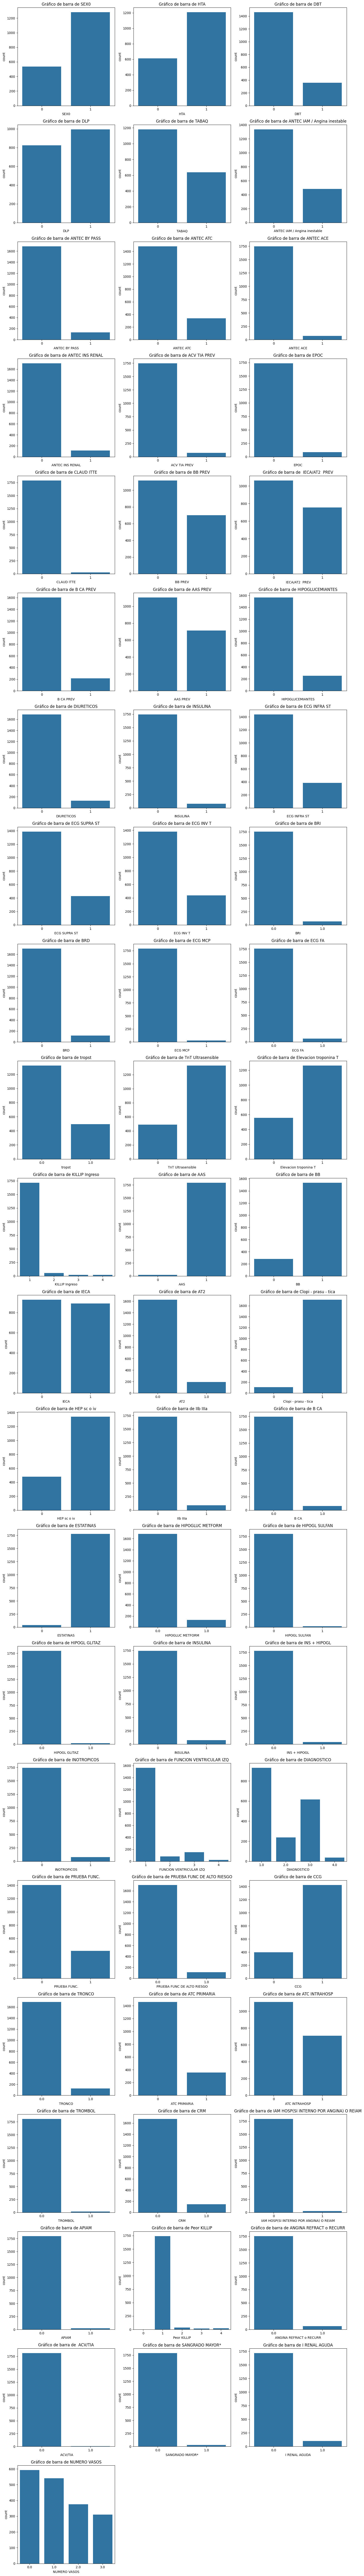

In [9]:
# Determinar el número de filas necesario
num_cols = 3
num_rows = math.ceil(len(CATEGORY_FEATURES) / num_cols)

# Crear una figura con subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Aplanar los ejes para iterar fácilmente si hay más de una fila
axes = axes.flatten()

# Crear un gráfico de barra para cada columna categórica
for i, col in enumerate(CATEGORY_FEATURES):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Gráfico de barra de {col}')

# Eliminar cualquier subplot sobrante
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para que no se sobrepongan los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

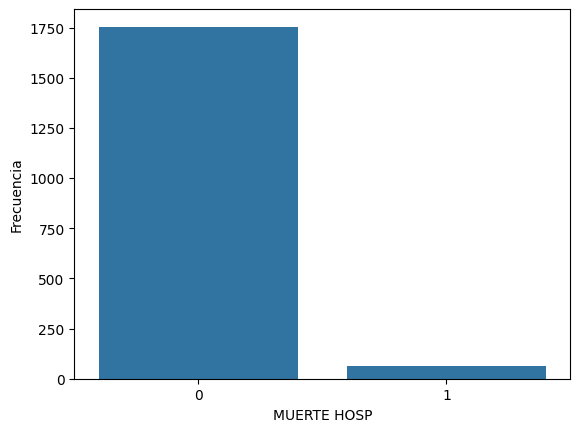

In [10]:
frecuencias_target = df[TARGET].value_counts()

df_frecuencias = frecuencias_target.reset_index()
df_frecuencias.columns = ['MUERTE HOSP', 'Frecuencia']

sns.barplot(x='MUERTE HOSP', y='Frecuencia', data=df_frecuencias)
plt.show()

Vemos que las clases de la variable target estan muy desbalanceadas.

Finalmente calculamos las matrices de correlacion de Pearson y Spearman:

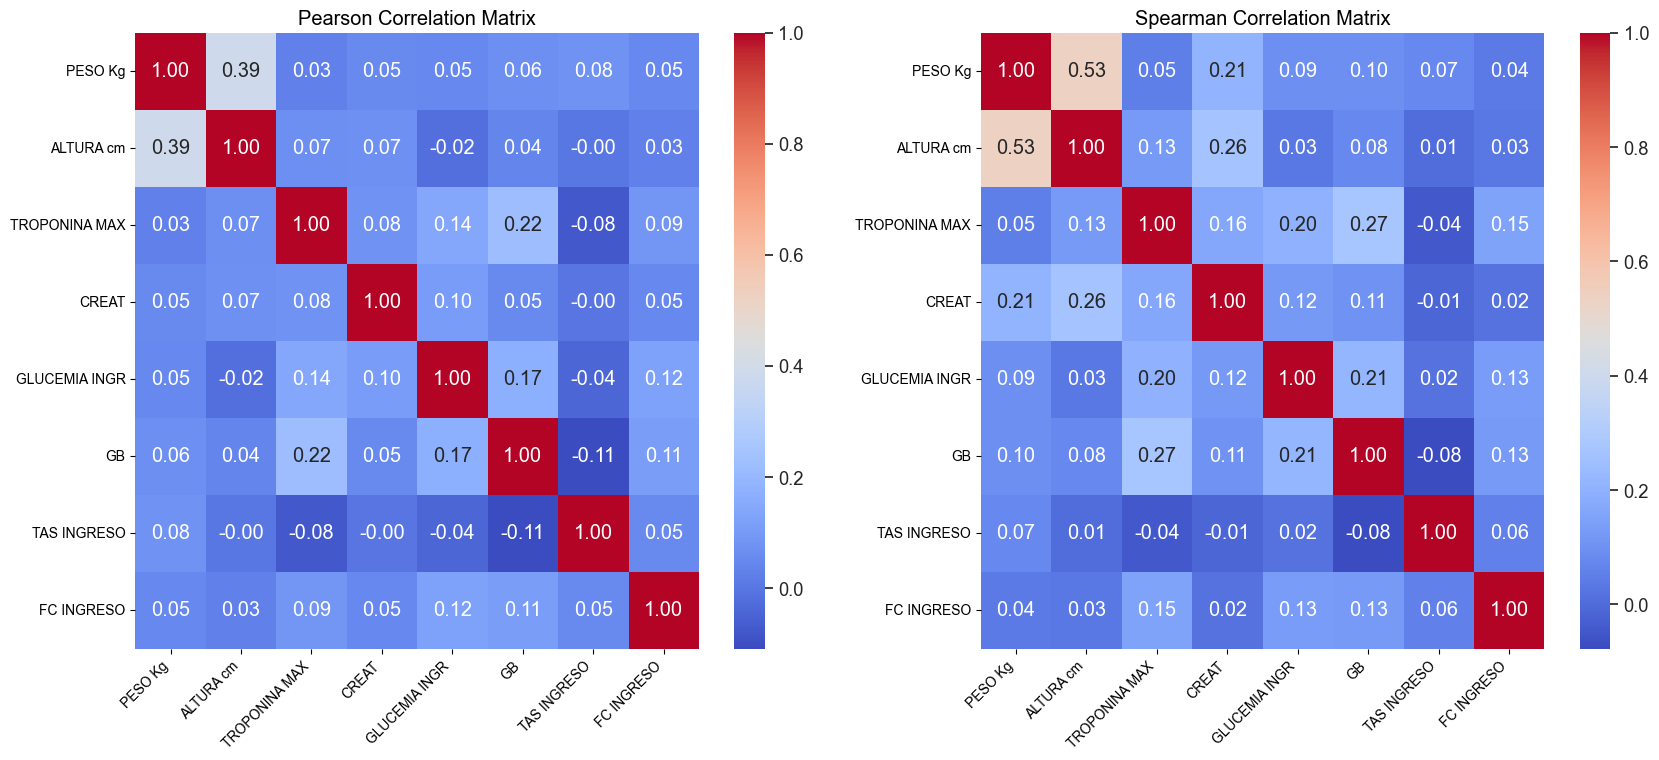

In [11]:
fig,ax = plt.subplots(1, 2,figsize=(20, 8))

# PEARSON CORRELATION MATRIX
pearson_corr_matrix = df[NUMERICAL_FEATURES].corr(method='pearson')
sns.set(font_scale=1.2)
sns.heatmap(pearson_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax[0])
ax[0].grid(False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_title("Pearson Correlation Matrix")

# SPEARMAN CORRELATION MATRIX
spearman_corr_matrix = df[NUMERICAL_FEATURES].corr(method='spearman')
sns.set(font_scale=1.2)
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax[1])
ax[1].grid(False)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_title("Spearman Correlation Matrix")

plt.show()